# Exploitation des résultats des longitudinales

## Préparation des données

In [89]:
import yaml,operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms
import itertools as it
import seaborn as sns

In [90]:
%matplotlib inline

#### Ouvrir le fichier résultats

In [91]:
filePrefix="/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/"
with open(filePrefix+"Longitudinal-X-Resultats-Recalcul.yaml", 'r') as stream:
    longitudinal=yaml.load(stream)

#### Découper les résultats en fonction des étapes et des types de paradigmes
- étapes :
 - Swim1 avec les contextes phonologiques
 - Swim2 avec les formes de Swim1 mais sans les contextes phonologiques
- types de paradigmes :
 - paradigme morphosyntaxique avec les colonnes standards correspondant aux propriétés morphosyntaxiques
 - paradigme morphomique issu du regroupement des colonnes compatibles avec réextension aux cases standards à la fin

In [92]:
msp1Dict={}
msp2Dict={}
omp1Dict={}
omp2Dict={}
for k in longitudinal:
    if "Morphomes" in k:
        kSimple=k.strip("-X-Morphomes")
        omp1Dict[kSimple]=longitudinal[k]["Swim1"]
        omp2Dict[kSimple]=longitudinal[k]["Swim2"]
    else:
        kSimple=k.strip("-X")
        msp1Dict[kSimple]=longitudinal[k]["Swim1"]
        msp2Dict[kSimple]=longitudinal[k]["Swim2"]

#### Création des DF pour chaque combinaison
- orient="index" pour transformer les clés en index,colonnes

In [93]:
msp1=pd.DataFrame.from_dict(msp1Dict,orient="index")
msp2=pd.DataFrame.from_dict(msp2Dict,orient="index")
omp1=pd.DataFrame.from_dict(omp1Dict,orient="index")
omp2=pd.DataFrame.from_dict(omp2Dict,orient="index")

#### Mise en forme des colonnes avant fusion
- suppression des colonnes redondantes (*colonnesUniques*)
- suffixation des autres colonnes pour les distinguer
 - type de paradigme :
   - S pour morphosyntaxique
   - M pour morphomique
 - étape de SWIM
   - 1 pour Swim1
   - 2 pour Swim2

In [94]:
colonnesUniques=["nbGoldForms","nbInitialForms","nbLexemes"]
for colonne in colonnesUniques:
    del msp2[colonne]
    del omp1[colonne]
    del omp2[colonne]
msp1.columns=[c+"-S1" if not c in colonnesUniques else c for c in msp1.columns]
msp2.columns=[c+"-S2" for c in msp2.columns]
omp1.columns=[c+"-M1" for c in omp1.columns]
omp2.columns=[c+"-M2" for c in omp2.columns]


In [95]:
msp1[["TP-S1","UG-S1","nbGoldForms"]]

,TP-S1,UG-S1,nbGoldForms
00-T10000-F3663,8505,45354,53859
01-T20000-F5816,16950,59685,76635
02-T30000-F7497,24618,65064,89682
03-T40000-F8900,31318,68324,99642
04-T50000-F10082,36322,72396,108718
05-T60000-F11252,41305,73543,114848
06-T70000-F12207,44658,74765,119424
07-T80000-F13155,48145,75984,124130
08-T90000-F14038,50839,76879,127719
09-T100000-F14858,53821,77431,131253


#### Fusion des DF

In [96]:
df=pd.merge(msp1,msp2, left_index=True, right_index=True)
df=pd.merge(df,omp1, left_index=True, right_index=True)
df=pd.merge(df,omp2, left_index=True, right_index=True)

#### Ajout des colonnes *forms* et *tokens*

In [97]:
df["forms"]=df.index.str.split("-").str[-1].str.strip("F").astype(int)
df["tokens"]=df.index.str.split("-").str[1].str.strip("T").astype(int)
df["M-tokens"]=df["tokens"].astype(float)/1000000
df["numero"]=df.index.str.split("-").str[0].astype(int)
df.sort_values(by="numero")[["tokens","M-tokens","forms","nbInitialForms","nbGoldForms","nbLexemes"]]

,tokens,M-tokens,forms,nbInitialForms,nbGoldForms,nbLexemes
00-T10000-F3663,10000,0.01,3663,3663,53859,1289
01-T20000-F5816,20000,0.02,5816,5816,76635,1770
02-T30000-F7497,30000,0.03,7497,7497,89682,2043
03-T40000-F8900,40000,0.04,8900,8900,99642,2282
04-T50000-F10082,50000,0.05,10082,10082,108718,2447
05-T60000-F11252,60000,0.06,11252,11252,114848,2598
06-T70000-F12207,70000,0.07,12207,12207,119424,2713
07-T80000-F13155,80000,0.08,13155,13155,124130,2830
08-T90000-F14038,90000,0.09,14038,14038,127719,2925
09-T100000-F14858,100000,0.10,14858,14858,131253,3016


In [98]:
echantillons=[n for n in range(130) if not n in sorted(df["numero"].tolist())]
for k, g in it.groupby(enumerate(echantillons), lambda (i,x):i-x):
       print " ".join([str(n) for n in map(operator.itemgetter(1), g)])

#" ".join([str(n) for n in range(130) if not n in sorted(df["numero"].tolist())])

61 62 63
69 70 71 72 73


In [51]:
df.sort_values(by="numero")[["FP-S1","TP-S1","UG-S1","OG-S1","FP-M1","TP-M1","UG-M1","OG-M1"]]

,FP-S1,TP-S1,UG-S1,OG-S1,FP-M1,TP-M1,UG-M1,OG-M1
00-T10000-F3663,495,8505,45354,123,5175,15215,38644,186
01-T20000-F5816,716,16950,59685,262,7630,32171,44464,482
02-T30000-F7497,682,24618,65064,401,3968,38573,51109,575
03-T40000-F8900,903,31318,68324,518,3103,45777,53865,690
04-T50000-F10082,1090,36322,72396,562,5583,52620,56098,813
05-T60000-F11252,1023,41305,73543,699,3773,55985,58863,874
06-T70000-F12207,1043,44658,74765,743,3834,61910,57513,923
07-T80000-F13155,1044,48145,75984,813,8628,66838,57291,1076
08-T90000-F14038,1244,50839,76879,912,4307,68105,59613,1139
09-T100000-F14858,1177,53821,77431,949,4348,72980,58272,1200


#### Fonction pour les graphes

In [52]:
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.set_palette("husl")
sns.set_context("paper")
sns.set_context("notebook")

In [53]:
def reFormatTicks(x,pos):
    text="0"
    if x!=0:
        magnitude=int(np.log10(x))
        value=float(x)/(10**magnitude)
        value=("%.1f"%value).strip("0").strip(".")
        if value=="1":
            text="$\mathdefault{10^{%d}}$"%(magnitude)
        else:
            text="$\mathdefault{%s\\ 10^{%d}}$"%(value,magnitude)
    return text

In [54]:
def reFormatTicks(x,pos):
    text="0"
    if x!=0:
        magnitude=int(np.log10(x))
        x=round(float(x)/(10**magnitude),1)*10**magnitude
        if magnitude>=9:
            unit="G"
            value=("%.1f"%(float(x)/1e9)).strip("0").strip(".")
        elif magnitude>=6:
            unit="M"
            value=("%.1f"%(float(x)/1e6)).strip("0").strip(".")
        elif magnitude>=3:
            unit="k"
            value=("%.1f"%(float(x)/1e3)).strip("0").strip(".")
        else:
            unit=""
            value=("%.1f"%float(x)).strip("0").strip(".")
        text="%s%s"%(value,unit)
    return text

In [55]:
reFormatTicks(12500,(32,10))

'13k'

In [56]:
def addLine(h,ax):
    ax.axhline(h,ls="dotted",lw=.25)
    trans = transforms.blended_transform_factory(
        ax.get_yticklabels()[0].get_transform(), ax.transData)
    ax.text(0,h, "{:.1%}".format(h), color="black", transform=trans, 
            ha="right", va="center")
    return

In [57]:
def makeGraph(x,colonnes,xlabel="Number of initial %s",ylabel="Score",size=(8,8),hlines=[]):
    scale=x
    (largeur,hauteur)=size
    if scale=="M-tokens":
        size=(25,3)
    elif not "tokens" in scale:
        largeur*=2
        size=(largeur,hauteur)
    ax=df.set_index(scale).sort_values(by="numero")[colonnes].plot(figsize=size,marker=".")
    ax.set_xlabel(xlabel%scale)#,fontsize=16)
    ax.set_ylabel(ylabel)#,fontsize=16)
    if "M-tokens"==scale:
        ax.xaxis.set_ticks(np.linspace(2,130,num=55))
#        ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
    elif "tokens"==scale:
        ax.set_xscale("log")
        ax.set_xticks(np.logspace(4,8.5, num=10))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
    if ylabel=="Score":
        ax.set_yscale("linear")
        ax.yaxis.set_ticks(np.linspace(0,1,num=11))
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    elif ylabel=="Number of Forms":
        ax.set_yscale("log")
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
    for h in hlines:
        addLine(h,ax)
    return ax
        
'''Plotting values on the graph'''
#    for colonne in colonnes:
#        for (a,b) in zip(df.sort_values(by="numero")[scale],df.sort_values(by="numero")[colonne])[-10:]:
#            plt.text(a,b,"%0.3f"%b)

'Plotting values on the graph'

## Graphes et Commentaires

### Étapes

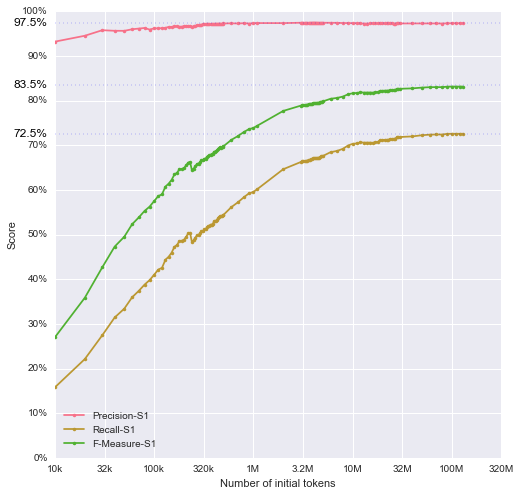

In [58]:
ax=makeGraph("tokens",["Precision-S1","Recall-S1","F-Measure-S1"],hlines=[.975,.835,.725])

In [59]:
df.sort_values(by="numero").ix[[0,-1]][["nbLexemes","nbGoldForms","Precision-S1","Recall-S1","F-Measure-S1","TP-S1"]]

,nbLexemes,nbGoldForms,Precision-S1,Recall-S1,F-Measure-S1,TP-S1
00-T10000-F3663,1289,53859,0.932259,0.157912,0.270077,8505
129-T130000000-F72864,5383,197790,0.973421,0.725846,0.831598,143565


#### SWIM1 : Précision plutôt que Rappel
Avec SWIM1, on obtient tout de suite une très bonne précision mais un faible rappel. Dès le premier échantillon avec 10.000 tokens, on a une précision de 93,23% à partir des 3663 formes connues pour 1289 lexèmes mais un rappel de 15,79% sur les 53859 formes à produire, c'est à dire 8505 nouvelles formes.

La précision évolue peu avec le nombre de tokens. Elle passe de 93,23% pour 10.000 tokens à 96,32% pour 130,000 tokens. En revanche, le rappel augmente avec la taille de l'échantillon de 15,79% à 44,37% pour les mêmes échantillons. Avec une précision constante et un rappel croissant, la F-mesure suit l'évolution du rappel et la performance globale est directement liée à la faiblesse du rappel : 27,01% pour 10.000 tokens, 60,76% pour 130.000 tokens.

SWIM1 optimise la précision au détriment du rappel en utilisant les contextes phonologiques précis pour conditionner les transformations entre formes.

Delta R 11.00%


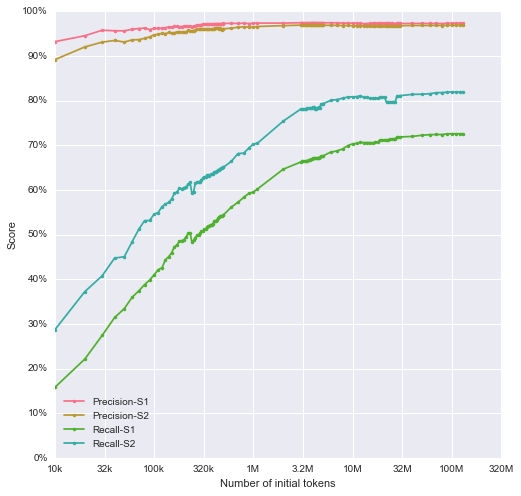

In [60]:
makeGraph("tokens",["Precision-S1","Precision-S2","Recall-S1","Recall-S2"])
df["DeltaF-S1S2"]=df["F-Measure-S2"]-df["F-Measure-S1"]
df["DeltaR-S1S2"]=df["Recall-S2"]-df["Recall-S1"]
print "Delta R %2.2f%%"%(df["DeltaR-S1S2"].mean()*100)

In [61]:
df.sort_values(by="numero").ix[[0,-1]][["Precision-S1","Recall-S1","F-Measure-S1","Precision-S2","Recall-S2","F-Measure-S2","TP-S1","TP-S2"]]

,Precision-S1,Recall-S1,F-Measure-S1,Precision-S2,Recall-S2,F-Measure-S2,TP-S1,TP-S2
00-T10000-F3663,0.932259,0.157912,0.270077,0.891946,0.287064,0.434340,8505,15461
129-T130000000-F72864,0.973421,0.725846,0.831598,0.968940,0.819374,0.887903,143565,162064


#### SWIM2 : Rappel plutôt que Précision
L'étape SWIM2 consiste à appliquer une nouvelle série de transformations comme dans l'étape précédente mais sans tenir compte des contextes phonologiques. Gràce à la précision des résultats obtenus à l'étape précédente et malgré un rappel relativement faible, les nouvelles formes ajoutées par SWIM1 sont assez fiables pour servir de nouvelles formes initiales pour cette deuxième étape. 

Le fait d'inclure ces nouvelles formes dans les paradigmes initiaux impose de nouvelles contraintes de fidélité sur les cliques qui compensent en partie la perte d'information sur les contextes phonologiques. La précision baisse un peu mais la perte s'atténue avec la taille de l'échantillon, 89,19% contre 93,23% à 10.000 tokens mais 95% contre 96,32% à 130.000 tokens.

En revanche, le rappel augmente de 13,29% sur l'ensemble des échantillons. Il passe de 15,79% à 28,71% à 10.000 tokens et de 44,37% à 56,82% à 130.000 tokens

SWIM2 capitalise sur la précision des résultats de SWIM1 pour trouver de nouvelles formes à inclure dans les paradigmes sans tenir compte des propriétés phonologiques des contextes. La différence de précision entre les deux étapes est restreinte et c'est le rappel qui conditionne la variation de la F-mesure +12,69% en moyenne.

Delta F 7.95%


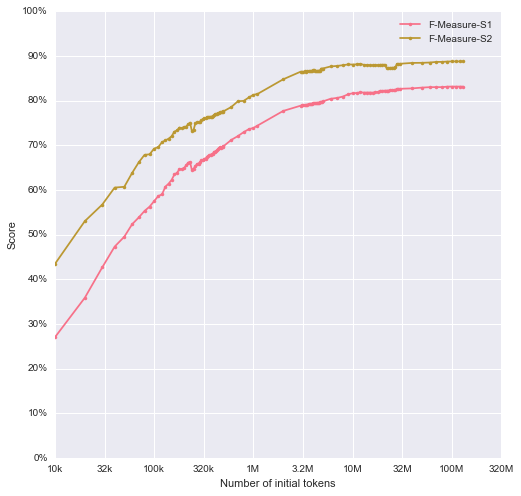

In [62]:
makeGraph("tokens",["F-Measure-S1","F-Measure-S2"])
print "Delta F %2.2f%%"%(df["DeltaF-S1S2"].mean()*100)

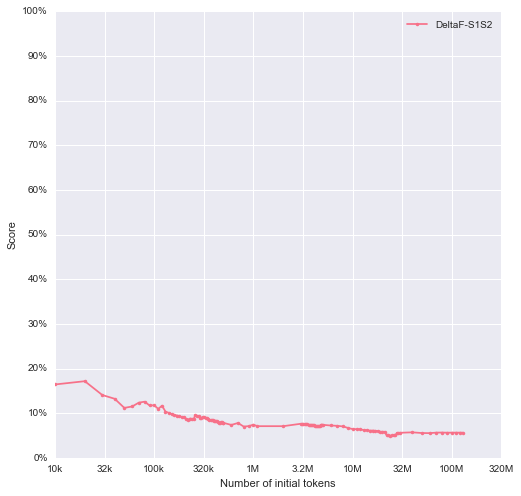

In [63]:
makeGraph("tokens",["DeltaF-S1S2"])

### Types de paradigmes

Delta P -1.68%
Delta R 11.69%
Delta F 8.37%


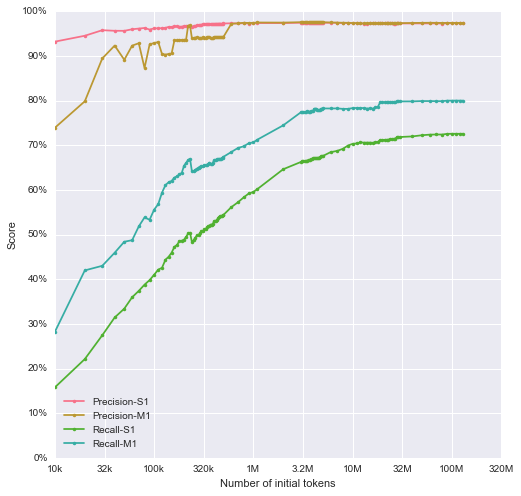

In [64]:
makeGraph("tokens",["Precision-S1","Precision-M1","Recall-S1","Recall-M1"])
df["DeltaP-S1M1"]=df["Precision-M1"]-df["Precision-S1"]
df["DeltaR-S1M1"]=df["Recall-M1"]-df["Recall-S1"]
df["DeltaF-S1M1"]=df["F-Measure-M1"]-df["F-Measure-S1"]
print "Delta P %2.2f%%"%(df["DeltaP-S1M1"].mean()*100)
print "Delta R %2.2f%%"%(df["DeltaR-S1M1"].mean()*100)
print "Delta F %2.2f%%"%(df["DeltaF-S1M1"].mean()*100)

En passant d'un paradigme morphosyntaxique classique à un paradigme morphomique, il se produit deux effets. 

D'un côté, le regroupement des cases morphosyntaxiques compatibles en une case morphomique permet d'obtenir beaucoup plus de co-formes pour chaque paire de cases et de fait une meilleure couverture des transformations entre formes et des contextes phonologiques plus précis. 

D'un autre côté, les regroupements morphomiques constituent par eux-mêmes des prédictions sur les formes puisque les cases regroupées sont considérées comme syncrétiques, toutes les formes qui se trouvent associées à une même case morphomique sont par hypothèse identiques.

Au départ, les deux effets s'opposent. Avec peu de formes dans les paradigmes, les regroupements permettent d'obtenir des meilleurs résultats à l'intérieur de SWIM mais certains regroupements de cases syncrétiques sont des erreurs liées au petit nombre de co-formes dans l'échantillon brut. Ces erreurs au niveau de l'abstraction du paradigme morphomique se répercutent sur la précision quand les formes générées sont redistribuées à mauvais escient dans les cases morphosyntaxiques en sortie.

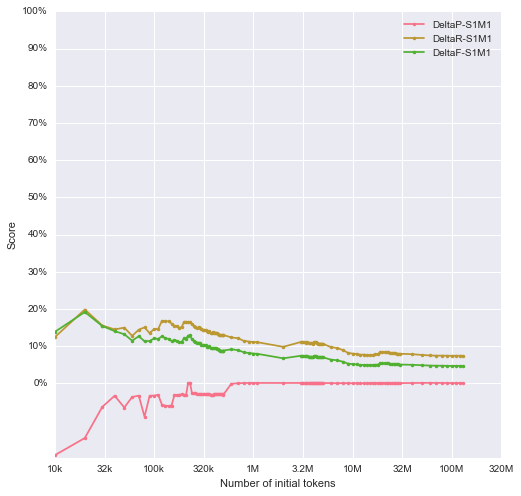

In [65]:
makeGraph("tokens",["DeltaP-S1M1","DeltaR-S1M1","DeltaF-S1M1"])

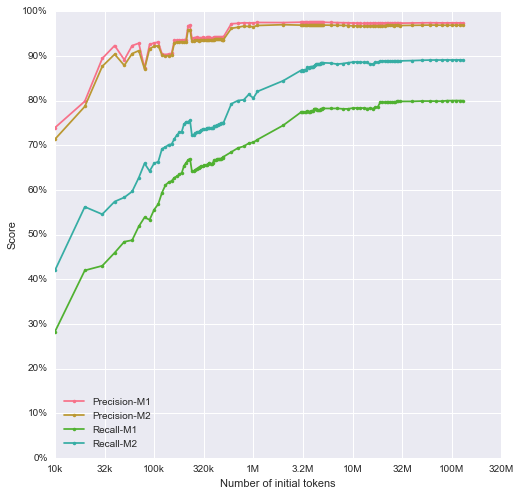

In [66]:
makeGraph("tokens",["Precision-M1","Precision-M2","Recall-M1","Recall-M2"])

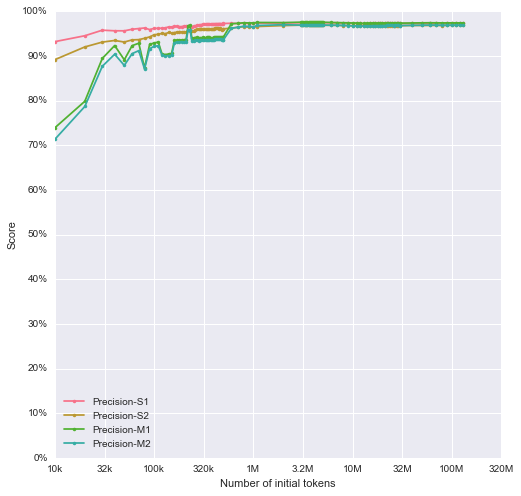

In [67]:
makeGraph("tokens",["Precision-S1","Precision-S2","Precision-M1","Precision-M2"])

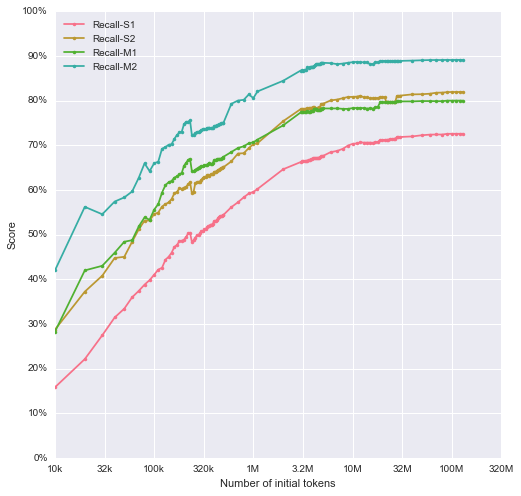

In [68]:
makeGraph("tokens",["Recall-S1","Recall-S2","Recall-M1","Recall-M2"])

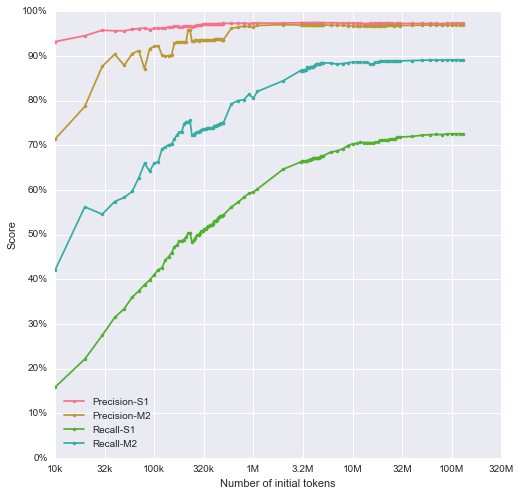

In [69]:
makeGraph("tokens",["Precision-S1","Precision-M2","Recall-S1","Recall-M2"])

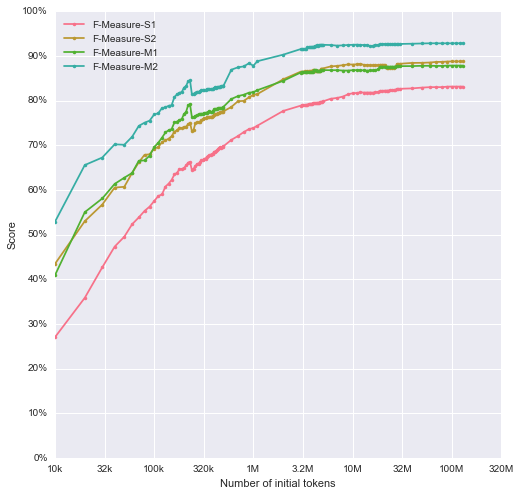

In [70]:
makeGraph("tokens",["F-Measure-S1","F-Measure-S2","F-Measure-M1","F-Measure-M2"])

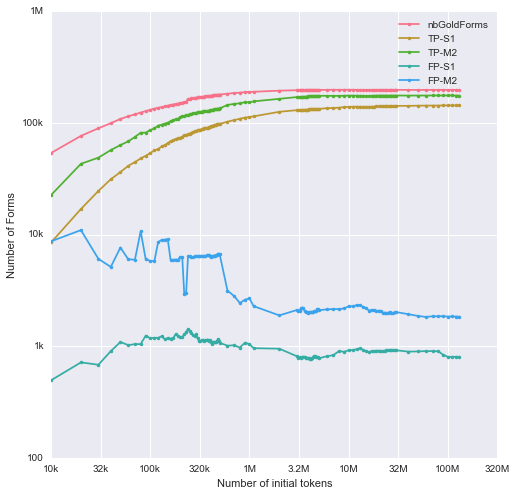

In [71]:
makeGraph("tokens",["nbGoldForms","TP-S1","TP-M2","FP-S1","FP-M2"],ylabel="Number of Forms")

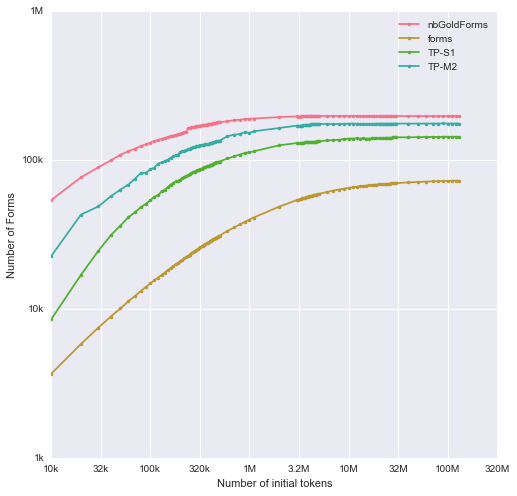

In [72]:
makeGraph("tokens",["nbGoldForms","forms","TP-S1","TP-M2"],ylabel="Number of Forms")

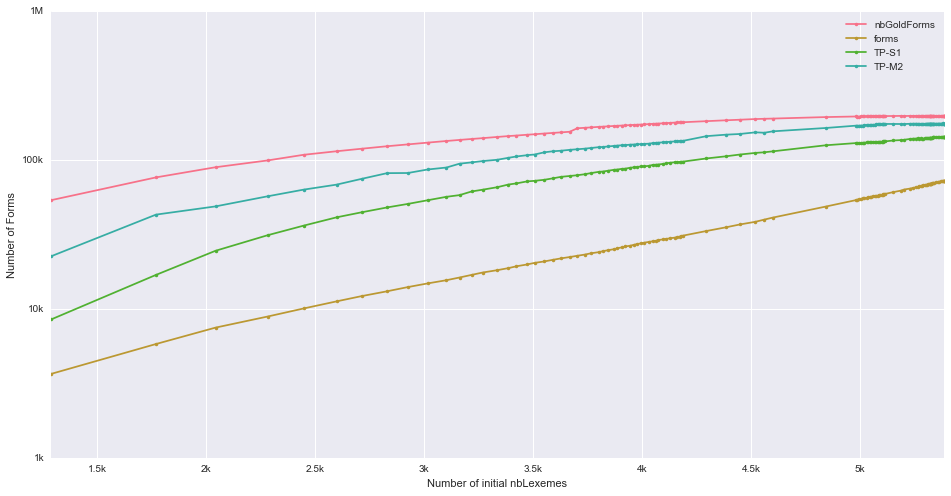

In [73]:
makeGraph("nbLexemes",["nbGoldForms","forms","TP-S1","TP-M2"],ylabel="Number of Forms")

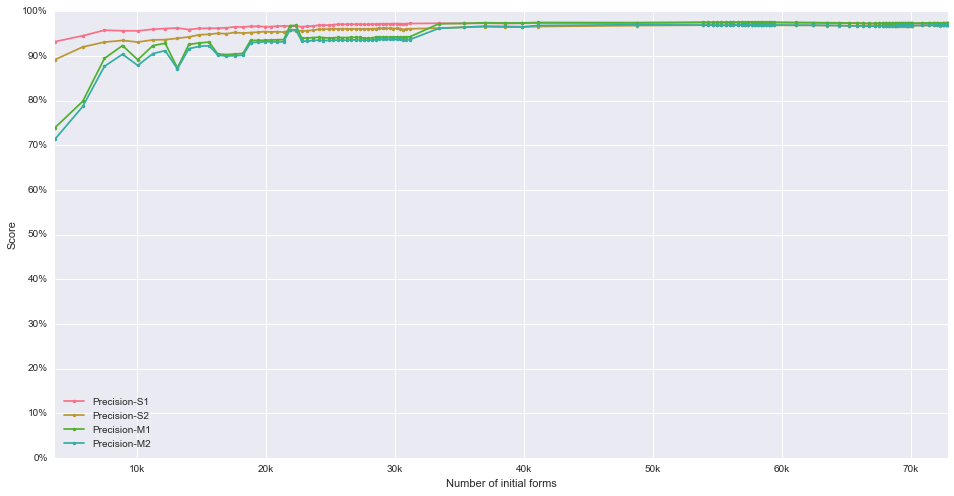

In [74]:
makeGraph("forms",["Precision-S1","Precision-S2","Precision-M1","Precision-M2"])

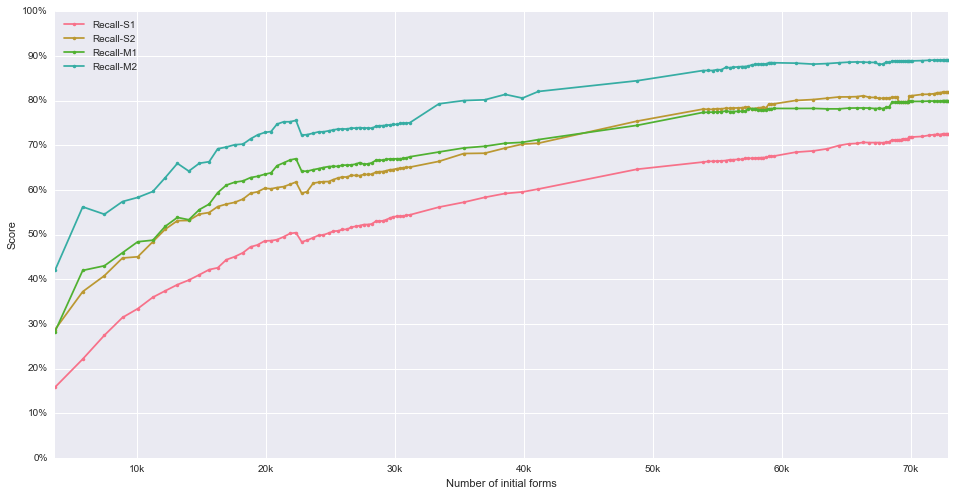

In [75]:
makeGraph("forms",["Recall-S1","Recall-S2","Recall-M1","Recall-M2"])

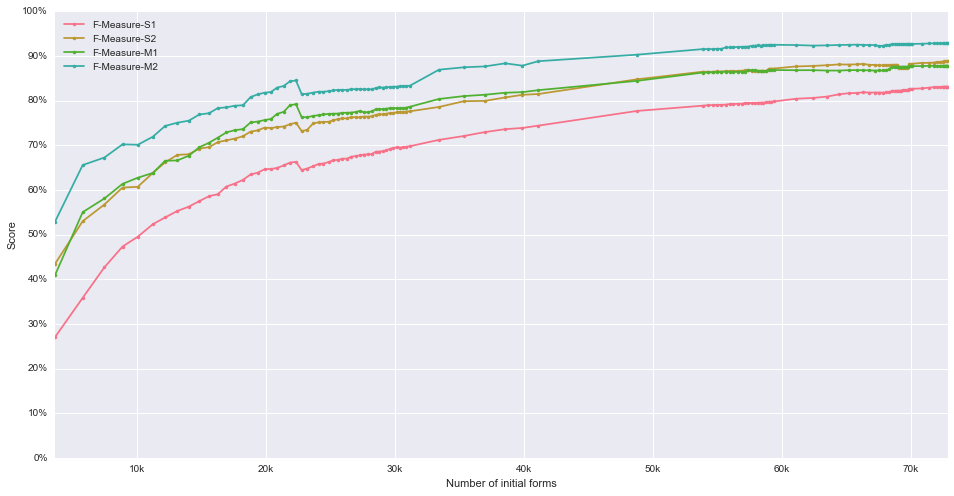

In [76]:
makeGraph("forms",["F-Measure-S1","F-Measure-S2","F-Measure-M1","F-Measure-M2"])

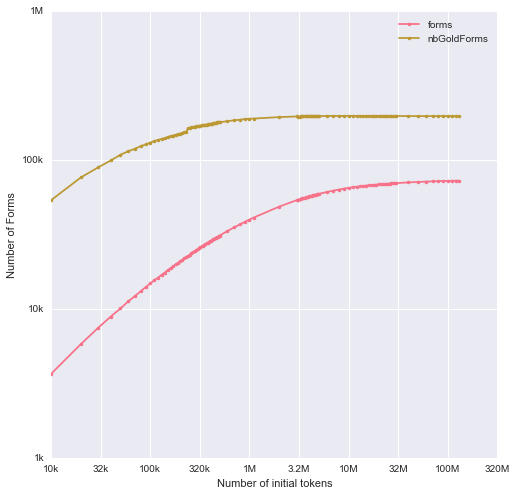

In [77]:
makeGraph("tokens",["forms","nbGoldForms"],ylabel="Number of Forms")

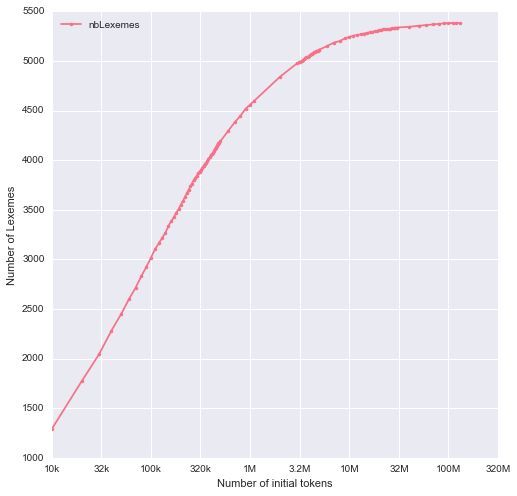

In [78]:
makeGraph("tokens",["nbLexemes"],ylabel="Number of Lexemes")

# Qu'est-ce qu'il se passe si on mélange les profils de fréquences entre lexèmes ?

- faire une substitution des lexèmes et des formes dans les échantillons et voir ce qui se produit dans les généralisations
 - quelles irrégularités pourraient survivre à une inversion des fréquences ?